# Assignment 9: New Analysis

In [1]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.stats import norm
import seaborn as sns

## Part 1: Kelly Chang

### 0. Setup

In [2]:
np.random.seed(12345678)  # for reproducibility, set random seed

# Read in data
df = pd.read_csv('../output.csv')

nvox = 64*64*48 # assume number of voxels per bin
df['weighted'] = df['synapses']/df['unmasked']*nvox

df.head()

,cx,cy,cz,unmasked,synapses,weighted
0,19,1369,55,5063,0,0.0
1,19,1369,166,3576,0,0.0
2,19,1369,277,4561,0,0.0
3,19,1369,388,1521,0,0.0
4,19,1369,499,1521,0,0.0


### 1. Visualize weighted data slices with edges removed

In [3]:
xvals = df['cx'].unique()
yvals = df['cy'].unique()
zvals = df['cz'].unique()

# Get rid of the blank edges, Z-layer by Z-layer.
left = 0;
right = len(xvals);
top = 0;
bottom = len(yvals);
for z in zvals:
    this_z = df[df['cz']==z]
    
    # X direction
    xhist, bin_edges = np.histogram(this_z['cx'], weights = this_z['unmasked']/(nvox*len(yvals)), bins=len(xvals))
    
    left = max(left, np.argmax(xhist>0.5))
    right = min(right, len(xvals)-np.argmax(xhist[::-1]>0.5))
    
    # Y direction
    yhist, bin_edges = np.histogram(this_z['cy'], weights = this_z['unmasked']/(nvox*len(xvals)), bins=len(yvals))
    
    top = max(top, np.argmax(yhist>0.5))
    bottom = min(bottom, len(yvals)-np.argmax(yhist[::-1]>0.5))

# Copy new dataset without edges
df2 = df.copy()
for z in zvals:
    df2.drop(df2.index[(df2['cx']<xvals[left]) | (df2['cx']>=xvals[right])], inplace=True)
    df2.drop(df2.index[(df2['cy']<yvals[top]) | (df2['cy']>=yvals[bottom])], inplace=True)
print "There are", len(df2), "bins after removing the edges."
df2.head()

There are 35112 bins after removing the edges.


,cx,cy,cz,unmasked,synapses,weighted
6292,448,1369,55,126357,153,238.063772
6293,448,1369,166,139932,207,290.840237
6294,448,1369,277,150269,194,253.824488
6295,448,1369,388,138071,159,226.410122
6296,448,1369,499,150842,258,336.278119


In [4]:
xvals = df2['cx'].unique()
yvals = df2['cy'].unique()
zvals = df2['cz'].unique()

# Example X slices after removing edges
x = xvals[0]
Xslice = df2[df2['cx']==x].pivot_table(index='cz', columns='cy', values='weighted', aggfunc=np.sum)
plt.figure()
sns.heatmap(Xslice, xticklabels=10, yticklabels=3, 
            cbar_kws={'label': 'Weighted synapse count'});
plt.title('X = '+str(x)+' slice with edges removed');

x = xvals[-1]
Xslice = df2[df2['cx']==x].pivot_table(index='cz', columns='cy', values='weighted', aggfunc=np.sum)
plt.figure()
sns.heatmap(Xslice, xticklabels=10, yticklabels=3, 
            cbar_kws={'label': 'Weighted synapse count'});
plt.title('X = '+str(x)+' slice with edges removed');

# Example Y slices after removing edges
y = yvals[0]
Yslice = df2[df2['cy']==y].pivot_table(index='cz', columns='cx', values='weighted', aggfunc=np.sum)
plt.figure()
sns.heatmap(Yslice, xticklabels=20, yticklabels=3, 
            cbar_kws={'label': 'Weighted synapse count'});
plt.title('Y = '+str(y)+' slice with edges removed');

y = yvals[-1]
Yslice = df2[df2['cy']==y].pivot_table(index='cz', columns='cx', values='weighted', aggfunc=np.sum)
plt.figure()
sns.heatmap(Yslice, xticklabels=20, yticklabels=3, 
            cbar_kws={'label': 'Weighted synapse count'});
plt.title('Y = '+str(y)+' slice with edges removed');

# Example Z slices after removing edges
z = zvals[0]
Zslice = df2[df2['cz']==z].pivot_table(index='cy', columns='cx', values='weighted', aggfunc=np.sum)
plt.figure()
sns.heatmap(Zslice, xticklabels=20, yticklabels=10, 
            cbar_kws={'label': 'Weighted synapse count'});
plt.title('Z = '+str(z)+' slice with edges removed');

z = zvals[-1]
Zslice = df2[df2['cz']==z].pivot_table(index='cy', columns='cx', values='weighted', aggfunc=np.sum)
plt.figure()
sns.heatmap(Zslice, xticklabels=20, yticklabels=10, 
            cbar_kws={'label': 'Weighted synapse count'});
plt.title('Z = '+str(z)+' slice with edges removed');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 2. Visualized weighted data 1D projections with edges removed

In [5]:
plt.figure()
plt.hist(df2['cx'], weights=df2['weighted'], bins=xvals.size, color='g', edgecolor='none')
plt.title('Distribution of Weighted Synapses along X - coordinate')
plt.xlabel('X - coordinate')
plt.ylabel('Count')
plt.show()

plt.figure()
plt.hist(df2['cy'], weights=df2['weighted'], bins=yvals.size, color='g', edgecolor='none')
plt.title('Distribution of Weighted Synapses along Y - coordinate')
plt.xlabel('Y - coordinate')
plt.ylabel('Count')
plt.show()

plt.figure()
plt.hist(df2['cz'], weights=df2['weighted'], bins=zvals.size, color='g', edgecolor='none')
plt.title('Distribution of Weighted Synapses along Z - coordinate')
plt.xlabel('Z - coordinate')
plt.ylabel('Count')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 3. Visualize weighted data 2D projections with edges removed

In [6]:
sumXY = pd.pivot_table(df2, index='cy', columns='cx', values='weighted', aggfunc=np.sum)
sumXZ = pd.pivot_table(df2, index='cz', columns='cx', values='weighted', aggfunc=np.sum)
sumYZ = pd.pivot_table(df2, index='cz', columns='cy', values='weighted', aggfunc=np.sum)

plt.figure()
sns.heatmap(sumXY, xticklabels=20, yticklabels=10, cbar_kws={'label': 'Weighted'});
plt.title('Number of Weighted Synapses at X-Y coordinates');

plt.figure()
sns.heatmap(sumXZ, xticklabels=20, yticklabels=2, cbar_kws={'label': 'Weighted'});
plt.title('Number of Weighted Synapses at X-Z coordinates');

plt.figure()
sns.heatmap(sumYZ, xticklabels=10, yticklabels=2, cbar_kws={'label': 'Weighted'});
plt.title('Number of Weighted Synapses at Y-Z coordinates');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 4. 3D plot of weighted synapse data

In [7]:
sns.set_style('white')

wt_max = df2['weighted'].max()
cmap = np.array(sns.cubehelix_palette(256))
cmap = np.hstack((cmap, np.linspace(0,1,256).reshape(-1,1)))
subsamp = np.random.choice(len(df2), size=len(df2)/9, replace=False) # reduce resolution
idx = df2.index[subsamp]
colors = [cmap[np.rint(255*(df2.ix[i]['weighted']/wt_max)).astype(int)] for i in idx]
ax = plt.figure().gca(projection='3d')
patches = ax.scatter(xs=df2.ix[idx]['cx'], ys=df2.ix[idx]['cy'], zs=df2.ix[idx]['cz'], 
                     s=20*(df2.ix[idx]['weighted']/wt_max), c=colors,
                     edgecolors=None)
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_zlabel('Z')
plt.show()

<IPython.core.display.Javascript object>

### 5. 3D plot of high-density weighted synapse data

In [8]:
sns.set_style('white')

thresh = 250

wt_max = df2['weighted'].max()
cmap = np.array(sns.cubehelix_palette(256))
cmap = np.hstack((cmap, np.linspace(0,1,256).reshape(-1,1)))
df2thresh = df2[df2['weighted']>thresh] # high density data
subsamp = np.random.choice(len(df2thresh), size=len(df2thresh)/4, replace=False) # reduce resolution
idx = df2thresh.index[subsamp]
colors = [cmap[np.rint(255*(df2.ix[i]['weighted']/wt_max)).astype(int)] for i in idx]
ax = plt.figure().gca(projection='3d')
patches = ax.scatter(xs=df2.ix[idx]['cx'], ys=df2.ix[idx]['cy'], zs=df2.ix[idx]['cz'], 
                     s=40*((df2.ix[idx]['weighted']-thresh)/(wt_max-thresh)), c=colors,
                     edgecolors=None)
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_zlabel('Z')
plt.show()

<IPython.core.display.Javascript object>

### 6. 3D plot of very high-density weighted synapse data

In [9]:
sns.set_style('white')

thresh = 400

wt_max = df2['weighted'].max()
cmap = np.array(sns.cubehelix_palette(256))
cmap = np.hstack((cmap, np.linspace(0,1,256).reshape(-1,1)))
df2thresh = df2[df2['weighted']>thresh] # high density data
idx = df2thresh.index
colors = [cmap[np.rint(255*(df2.ix[i]['weighted']/wt_max)).astype(int)] for i in idx]
ax = plt.figure().gca(projection='3d')
patches = ax.scatter(xs=df2.ix[idx]['cx'], ys=df2.ix[idx]['cy'], zs=df2.ix[idx]['cz'], 
                     s=50*((df2.ix[idx]['weighted']-thresh)/(wt_max-thresh)), c=colors,
                     edgecolors=None)
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_zlabel('Z')
plt.show()

<IPython.core.display.Javascript object>

### 7. Histogram of weighted synapses with edges removed

In [10]:
sns.set_style('darkgrid')

step = 20
bin_edges = np.arange(0,np.ceil(df2['weighted'].max()/step)*step+1,step)

plt.figure()
df2['weighted'].hist(bins=bin_edges)
plt.xlabel('Weighted number of synapses')
plt.ylabel('Count')
plt.show()

<IPython.core.display.Javascript object>

### 8. Chi-squared test for uniform distribution

In [11]:
mw = df2['weighted'].mean()
print "The mean weighted number of synapses is", mw
expected = [mw]*len(df2)
(chi2,p) = ss.chisquare(df2['weighted'], f_exp=expected, ddof=1)
print "chi-squared statistic: ", chi2
print "p-value: ", p

The mean weighted number of synapses is 241.521542264
chi-squared statistic:  812212.798375
p-value:  0.0


Since the p-value is very small, we reject the null hypothesis that synapses are uniformly distributed with 241.5 synapses per bin on average.

### 9. Boxplot of weighted synapses with edges removed

In [12]:
plt.figure()
df2.boxplot(column='weighted', return_type='dict')
plt.show()

<IPython.core.display.Javascript object>

### 10. FFT of weighted synapse data with edges removed

<IPython.core.display.Javascript object>


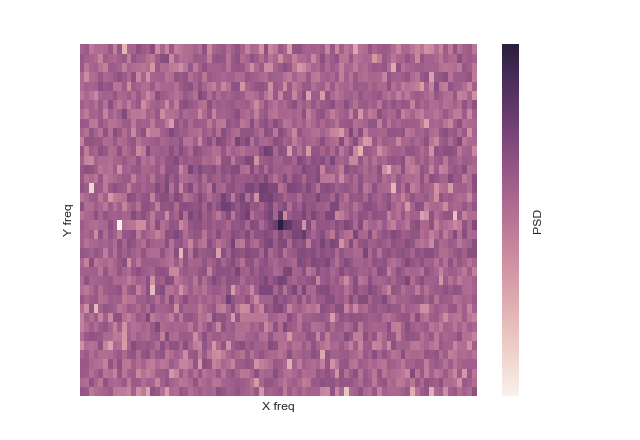

<IPython.core.display.Javascript object>


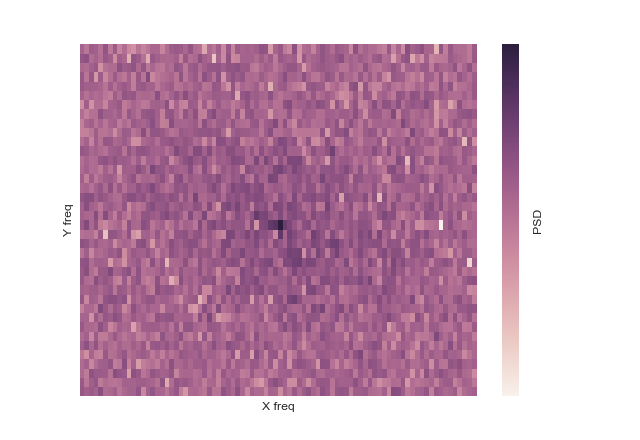

<IPython.core.display.Javascript object>


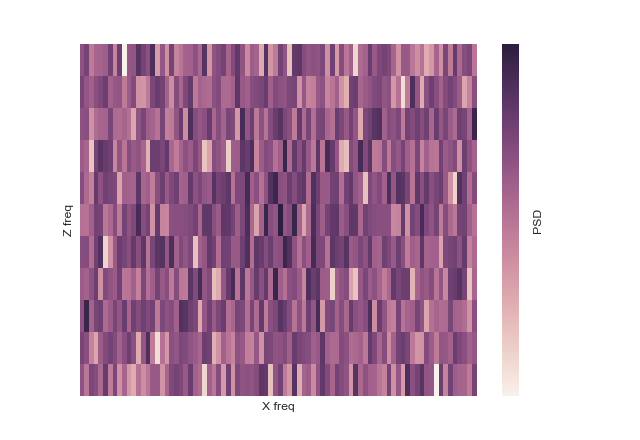

<IPython.core.display.Javascript object>


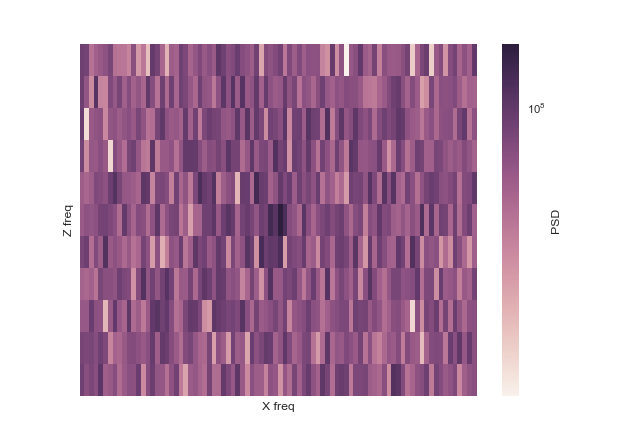

<IPython.core.display.Javascript object>


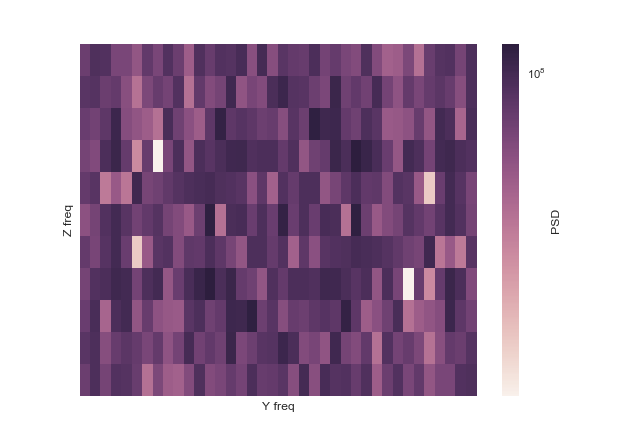

<IPython.core.display.Javascript object>


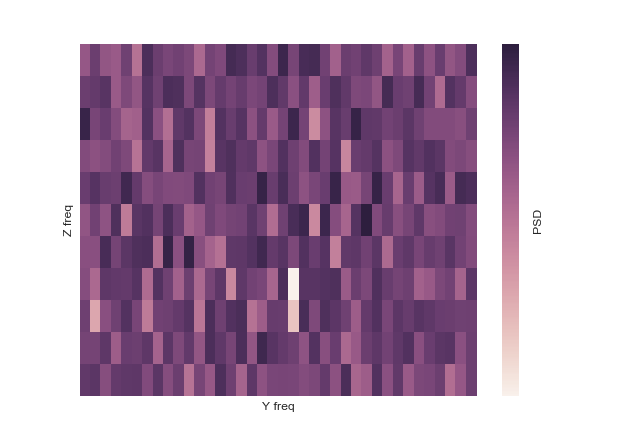

In [18]:
from matplotlib.colors import LogNorm

S = np.array([
        pd.pivot_table(df2[df2['cx']==x], index='cy', columns='cz', values='weighted', aggfunc=np.sum).values 
        for x in xvals
    ])

# print pd.pivot_table(df2[df2['cx']==x], index='cy', columns='cz', values='weighted', aggfunc=np.sum).head()

FS = np.fft.fftn(S)
PSD = np.abs(np.fft.fftshift(FS))**2

# Example XY slices
plt.figure()
data = PSD[:,:,0].T
sns.heatmap(data, xticklabels=False, yticklabels=False, 
            norm=LogNorm(vmin=data.min(), vmax=data.max()),
           cbar_kws={'label': 'PSD'})
plt.xlabel('X freq')
plt.ylabel('Y freq')
plt.show()

plt.figure()
data = PSD[:,:,-1].T
sns.heatmap(data, xticklabels=False, yticklabels=False, 
            norm=LogNorm(vmin=data.min(), vmax=data.max()),
           cbar_kws={'label': 'PSD'})
plt.xlabel('X freq')
plt.ylabel('Y freq')
plt.show()


# Example XZ slices
plt.figure()
data = PSD[:,0,:].T
sns.heatmap(data, xticklabels=False, yticklabels=False, 
            norm=LogNorm(vmin=data.min(), vmax=data.max()),
           cbar_kws={'label': 'PSD'})
plt.xlabel('X freq')
plt.ylabel('Z freq')
plt.show()

plt.figure()
data = PSD[:,-1,:].T
sns.heatmap(data, xticklabels=False, yticklabels=False, 
            norm=LogNorm(vmin=data.min(), vmax=data.max()),
           cbar_kws={'label': 'PSD'})
plt.xlabel('X freq')
plt.ylabel('Z freq')
plt.show()

# Example YZ slices
plt.figure()
data = PSD[0,:,:].T
sns.heatmap(data, xticklabels=False, yticklabels=False, 
            norm=LogNorm(vmin=data.min(), vmax=data.max()),
           cbar_kws={'label': 'PSD'})
plt.xlabel('Y freq')
plt.ylabel('Z freq')
plt.show()

plt.figure()
data = PSD[-1,:,:].T
sns.heatmap(data, xticklabels=False, yticklabels=False, 
            norm=LogNorm(vmin=data.min(), vmax=data.max()),
           cbar_kws={'label': 'PSD'})
plt.xlabel('Y freq')
plt.ylabel('Z freq')
plt.show()